In [1]:
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.cluster import KMeans
import xgboost as xgb

train = pd.read_csv('train_updated.csv')
train = pd.DataFrame(train)
train.set_index('deviceid')

#pd.set_option('display.max_columns', 10)
#pd.set_option('display.max_rows', 10)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [2]:
train.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,...,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,...,4174.875000,14.200000,60.701250,4/1/21,10/6/19
1,36175,36.60,5.16,6.23,6.96,...,4161.000000,19.777778,52.097143,4/1/21,10/27/19
2,16107,5.51,5.04,4.52,5.96,...,4152.238095,19.200000,34.146667,4/1/21,10/31/19
3,27362,4.66,39.85,35.76,40.69,...,4164.631579,23.625000,42.496316,4/1/21,10/1/19
4,19463,5.10,43.24,4.63,5.26,...,4169.800000,12.666667,49.609333,4/1/21,9/13/19


In [3]:
#trainlag is df with lag columns
trainlag = train[['avg_time_charging_lag1', 'avg_time_charging_lag2', 'avg_time_charging_lag3', 'avg_time_charging_lag4', 
            'avg_time_charging_lag5', 'avg_time_charging_lag6', 'avg_time_charging_lag7', 'avg_time_charging_lag8', 
            'avg_time_charging_lag9', 'avg_time_charging_lag10', 'avg_time_charging_lag11', 'avg_time_charging_lag12', 
            'avg_time_charging_lag13', 'avg_time_charging_lag14',

            'avg_time_discharging_lag1', 'avg_time_discharging_lag2', 'avg_time_discharging_lag3', 'avg_time_discharging_lag4',
            'avg_time_discharging_lag5', 'avg_time_discharging_lag6', 'avg_time_discharging_lag7', 'avg_time_discharging_lag8',
            'avg_time_discharging_lag9', 'avg_time_discharging_lag10', 'avg_time_discharging_lag11', 'avg_time_discharging_lag12', 
            'avg_time_discharging_lag13', 'avg_time_discharging_lag14',

            'charging_rate_lag3', 'charging_rate_lag4', 'charging_rate_lag5', 'charging_rate_lag6', 'charging_rate_lag7',

            'discharging_rate_lag3', 'discharging_rate_lag4', 'discharging_rate_lag5', 'discharging_rate_lag6', 
            'discharging_rate_lag7', 'discharging_rate_lag8']].copy()

In [69]:
trainlag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_time_charging_lag1      40500 non-null  float64
 1   avg_time_charging_lag2      40500 non-null  float64
 2   avg_time_charging_lag3      40500 non-null  float64
 3   avg_time_charging_lag4      40500 non-null  float64
 4   avg_time_charging_lag5      40493 non-null  float64
 5   avg_time_charging_lag6      40472 non-null  float64
 6   avg_time_charging_lag7      40434 non-null  float64
 7   avg_time_charging_lag8      40338 non-null  float64
 8   avg_time_charging_lag9      40126 non-null  float64
 9   avg_time_charging_lag10     39703 non-null  float64
 10  avg_time_charging_lag11     38914 non-null  float64
 11  avg_time_charging_lag12     37743 non-null  float64
 12  avg_time_charging_lag13     36118 non-null  float64
 13  avg_time_charging_lag14     338

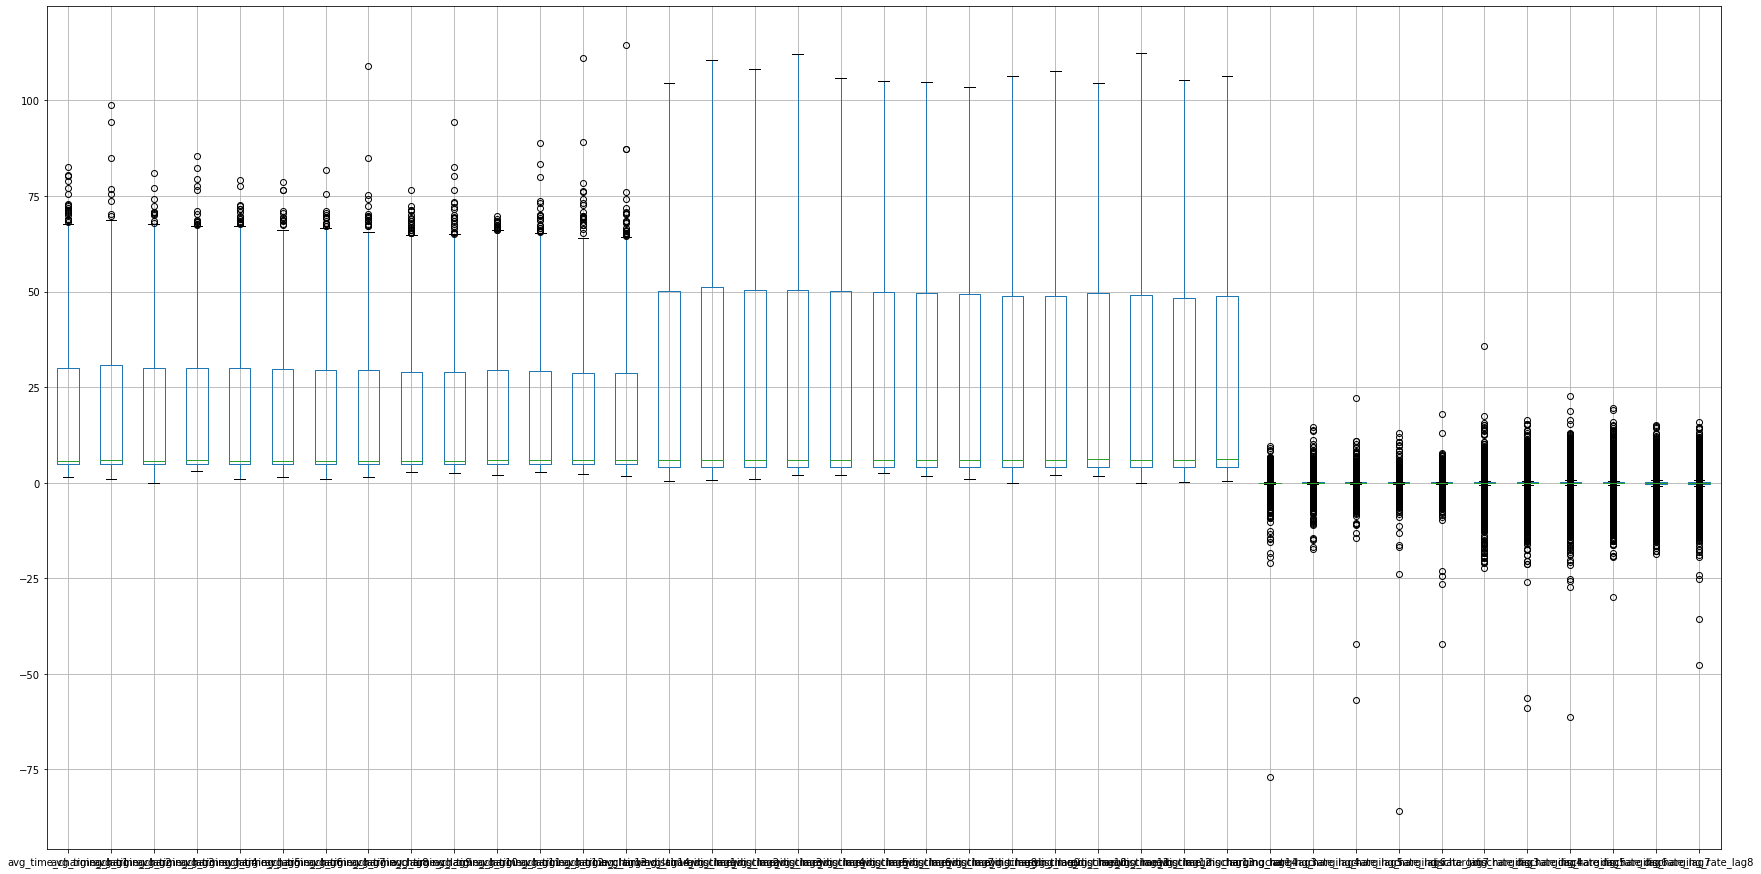

In [5]:
trainlag.boxplot(figsize=(30,15.5))
plt.show()

In [6]:
#df2 is df without lag columns
train2 = train[['deviceid','chargecycles', 'dischargecycles', 'total_off_time',
       'number_times_restart', 'avg_volt_change_charging',
       'avg_volt_change_discharging', 'avg_time_charging',
       'avg_time_discharging', 'max_voltage_day', 'piececount', 'cycle_time', 'Date Deployed', 
          'charge_cycle_time_below_12', 'fail_7']].copy()
train2 = train2.set_index('deviceid')

In [7]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40500 entries, 28647 to 20795
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargecycles                 40500 non-null  float64
 1   dischargecycles              40500 non-null  float64
 2   total_off_time               40500 non-null  float64
 3   number_times_restart         40500 non-null  float64
 4   avg_volt_change_charging     40500 non-null  float64
 5   avg_volt_change_discharging  40500 non-null  float64
 6   avg_time_charging            40500 non-null  float64
 7   avg_time_discharging         40500 non-null  float64
 8   max_voltage_day              40500 non-null  float64
 9   piececount                   40500 non-null  float64
 10  cycle_time                   40500 non-null  float64
 11  Date Deployed                40500 non-null  object 
 12  charge_cycle_time_below_12   40500 non-null  bool   
 13  fail_7      

In [8]:
train2

,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,...,piececount,cycle_time,Date Deployed,charge_cycle_time_below_12,fail_7
deviceid,,,,,,,,,,,
28647,50.250000,49.750000,49.000000,2.375000,377.080000,...,14.200000,60.701250,10/6/19,False,0
36175,56.285714,56.000000,36.857143,1.000000,350.517857,...,19.777778,52.097143,10/27/19,False,0
16107,80.380952,80.333333,2.333333,4.095238,346.113333,...,19.200000,34.146667,10/31/19,False,0
27362,91.736842,91.684211,10.789474,0.736842,356.184211,...,23.625000,42.496316,10/1/19,False,0
19463,71.066667,70.733333,14.266667,1.133333,370.904000,...,12.666667,49.609333,9/13/19,True,0
...,...,...,...,...,...,...,...,...,...,...,...
16284,83.434783,82.956522,17.739130,2.782609,365.399130,...,70.181818,36.957826,9/5/19,True,1
49732,64.866667,64.733333,0.266667,1.066667,378.554667,...,11.888889,46.168667,9/18/19,True,1
43158,84.727273,84.590909,6.727273,2.227273,345.429091,...,26.400000,47.638182,10/18/19,True,1


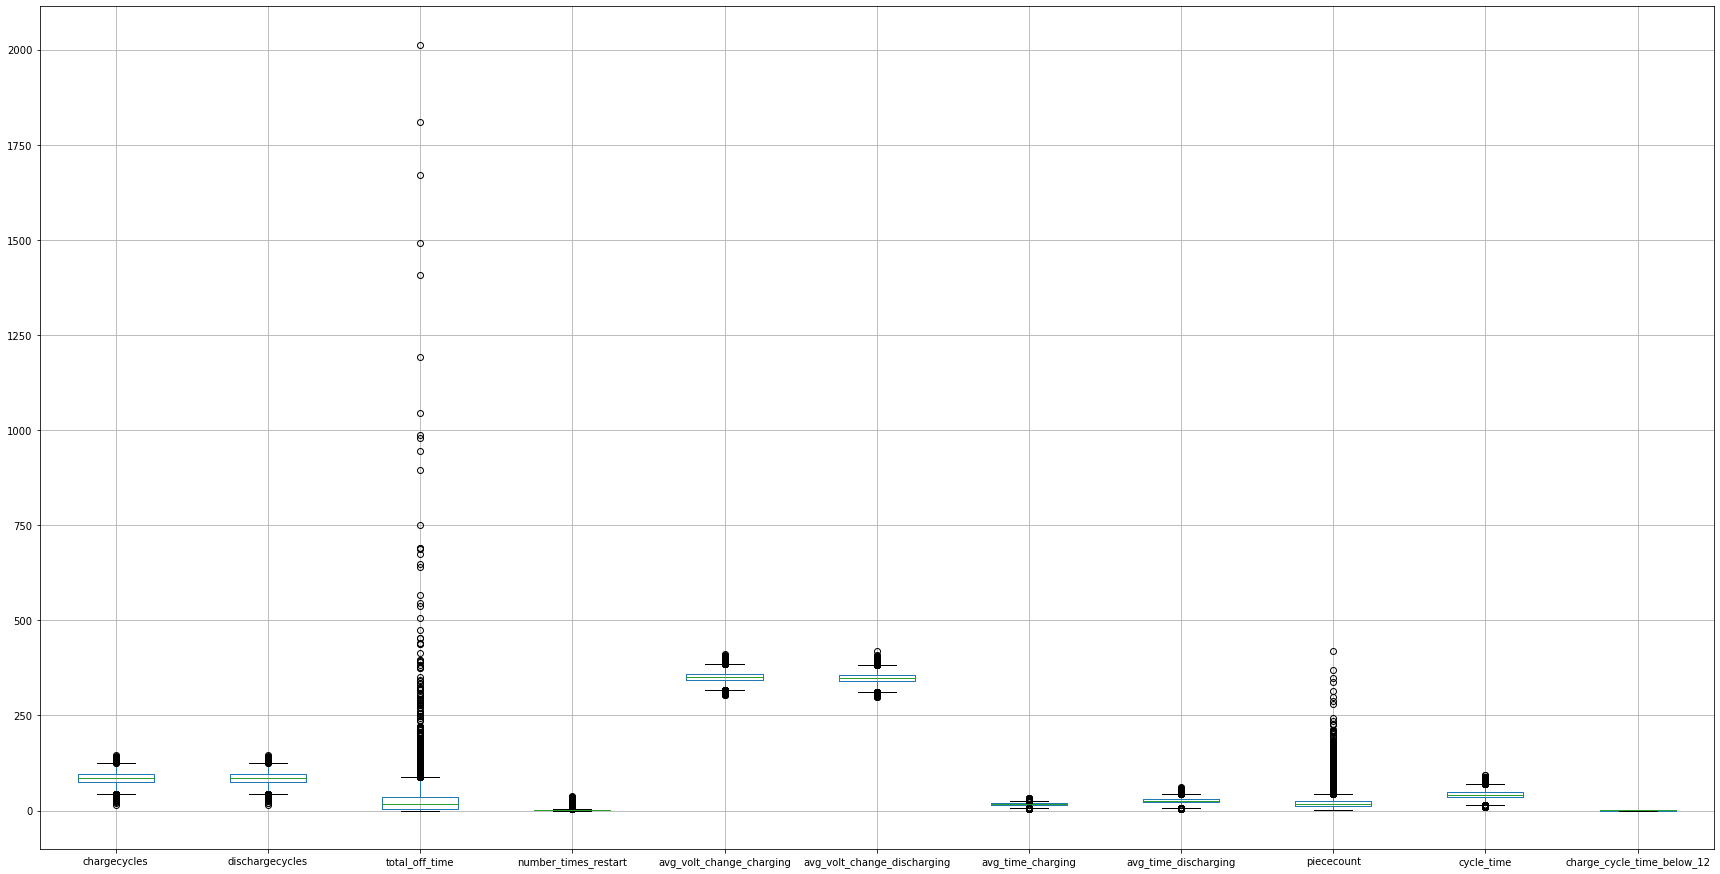

In [9]:
train2.drop(columns=["fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

In [10]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40500 entries, 28647 to 20795
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargecycles                 40500 non-null  float64
 1   dischargecycles              40500 non-null  float64
 2   total_off_time               40500 non-null  float64
 3   number_times_restart         40500 non-null  float64
 4   avg_volt_change_charging     40500 non-null  float64
 5   avg_volt_change_discharging  40500 non-null  float64
 6   avg_time_charging            40500 non-null  float64
 7   avg_time_discharging         40500 non-null  float64
 8   max_voltage_day              40500 non-null  float64
 9   piececount                   40500 non-null  float64
 10  cycle_time                   40500 non-null  float64
 11  Date Deployed                40500 non-null  object 
 12  charge_cycle_time_below_12   40500 non-null  bool   
 13  fail_7      

#### Split the data by response, fail_7

In [11]:
fail = train2[train2.fail_7 == 1].copy()
nofail = train2[train2.fail_7 == 0].copy()

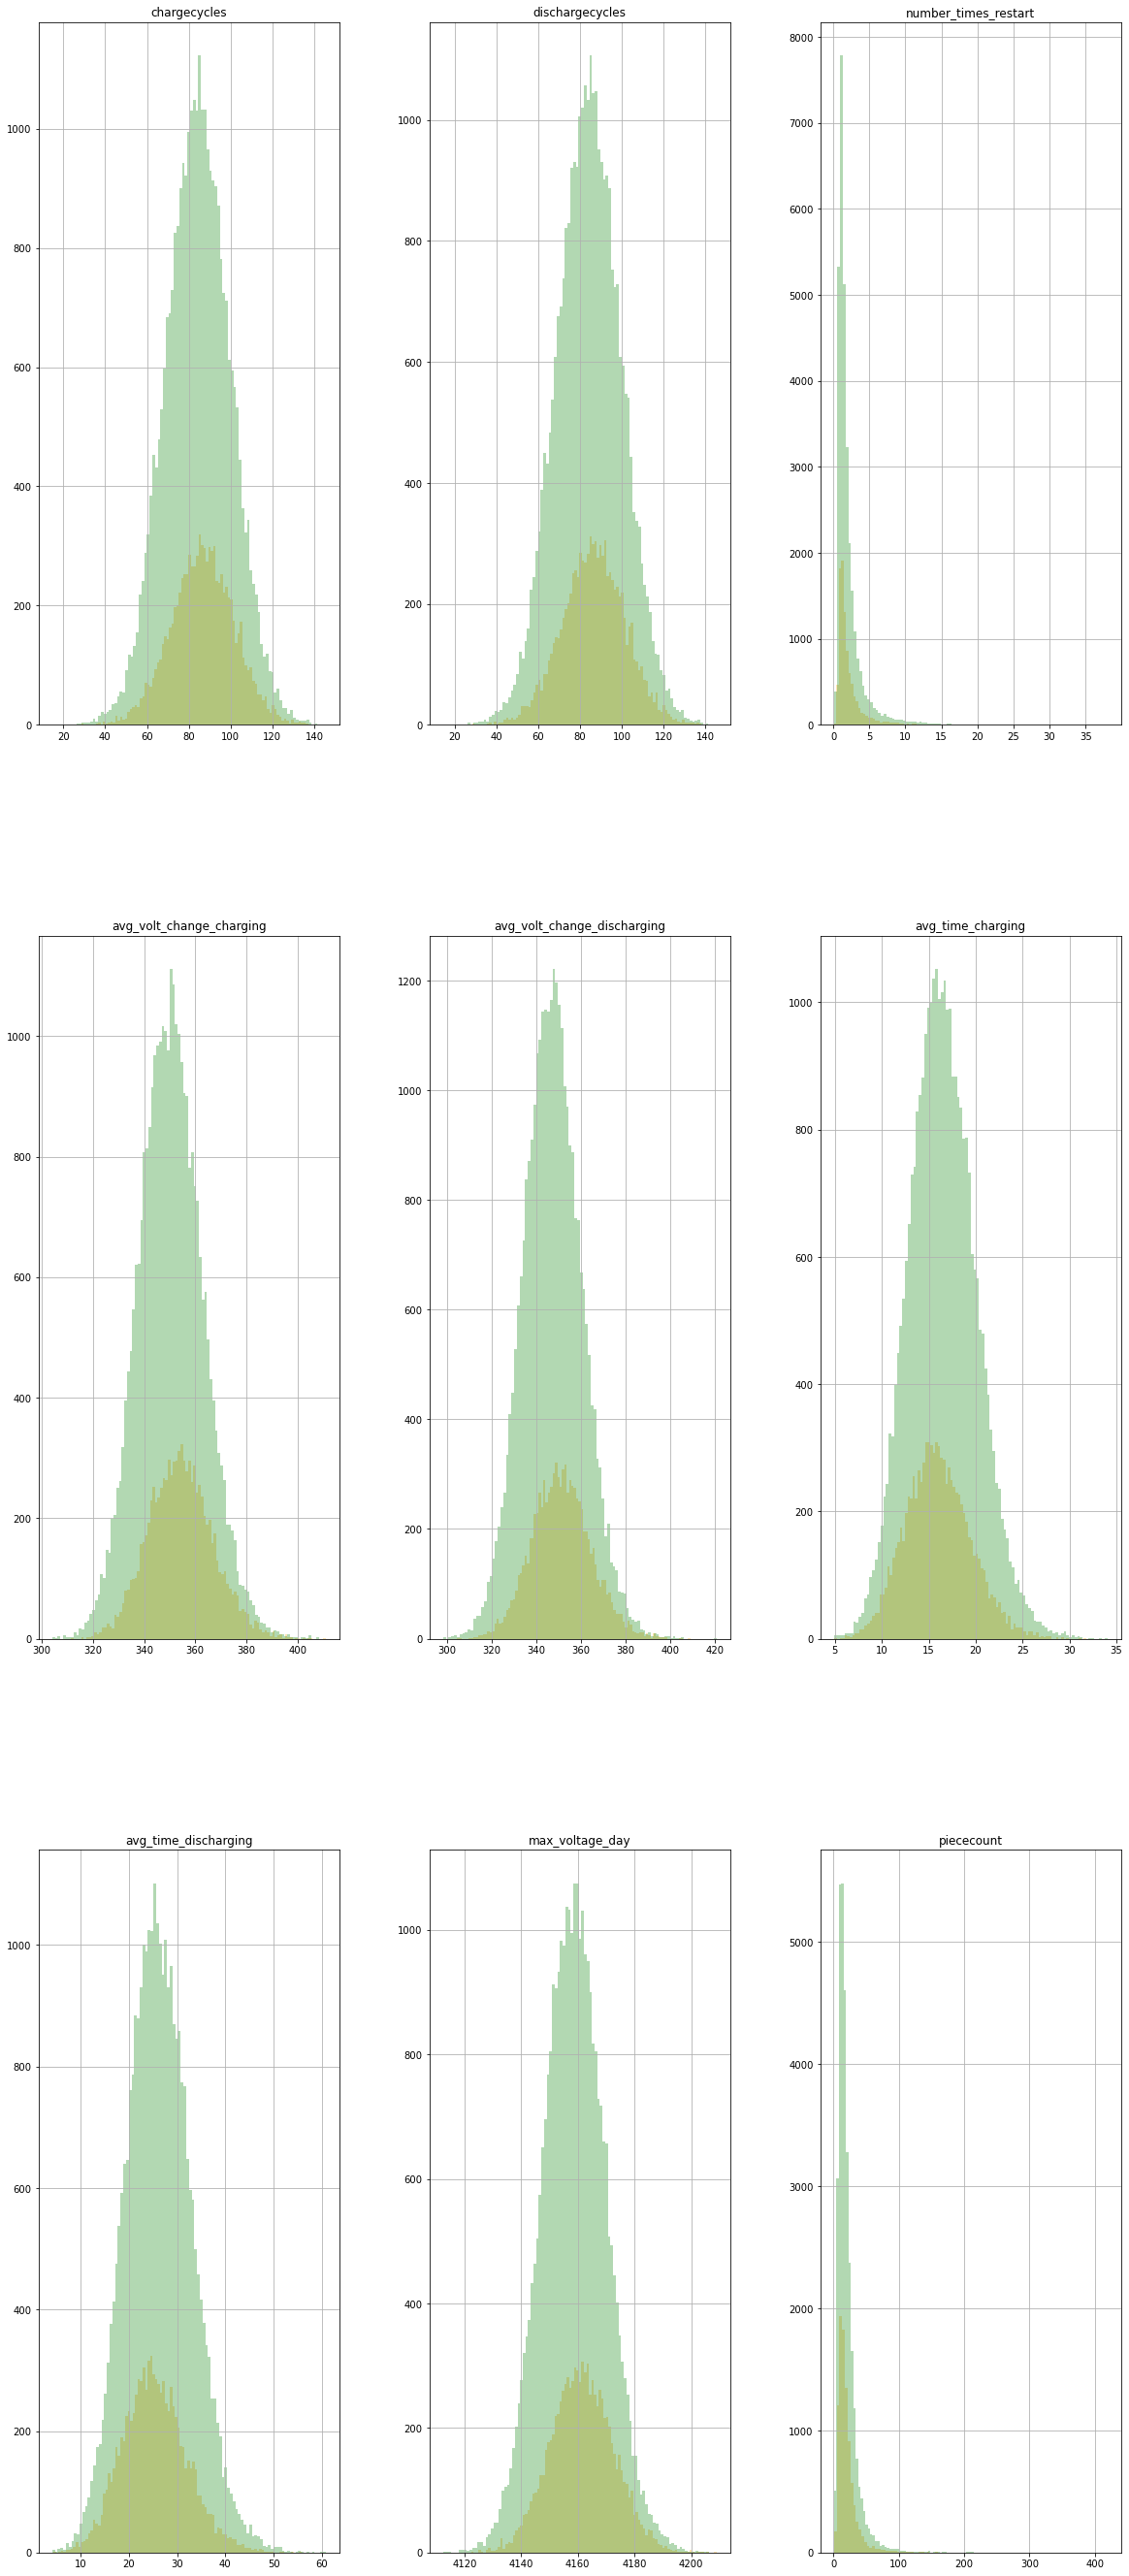

In [12]:
index = train2.select_dtypes(include=["float","int"]).columns
index = index.drop('total_off_time')
cols=[i for i in index]

fig, axes = plt.subplots(len(cols)//3, 3, figsize=(20, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        fail.hist(column = cols[i], bins = 100, ax=axis, color = 'orange', alpha = 0.3)
        nofail.hist(column = cols[i], bins = 100, ax=axis, color = 'green', alpha = 0.3)
        i = i+1

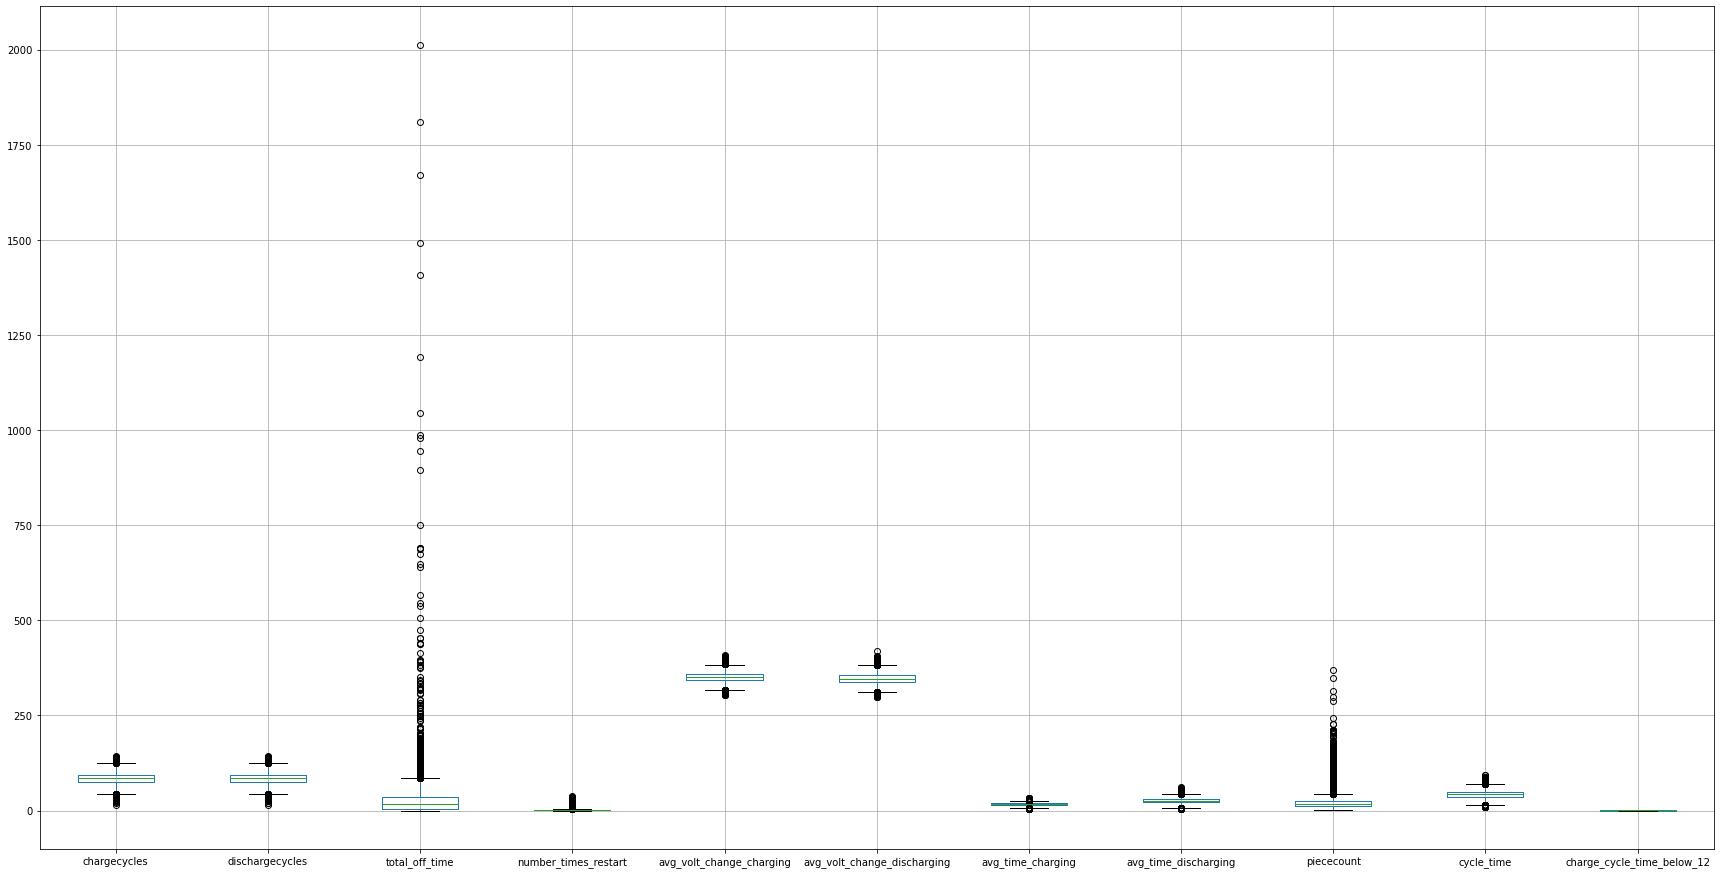

In [13]:
nofail.drop(columns=["fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

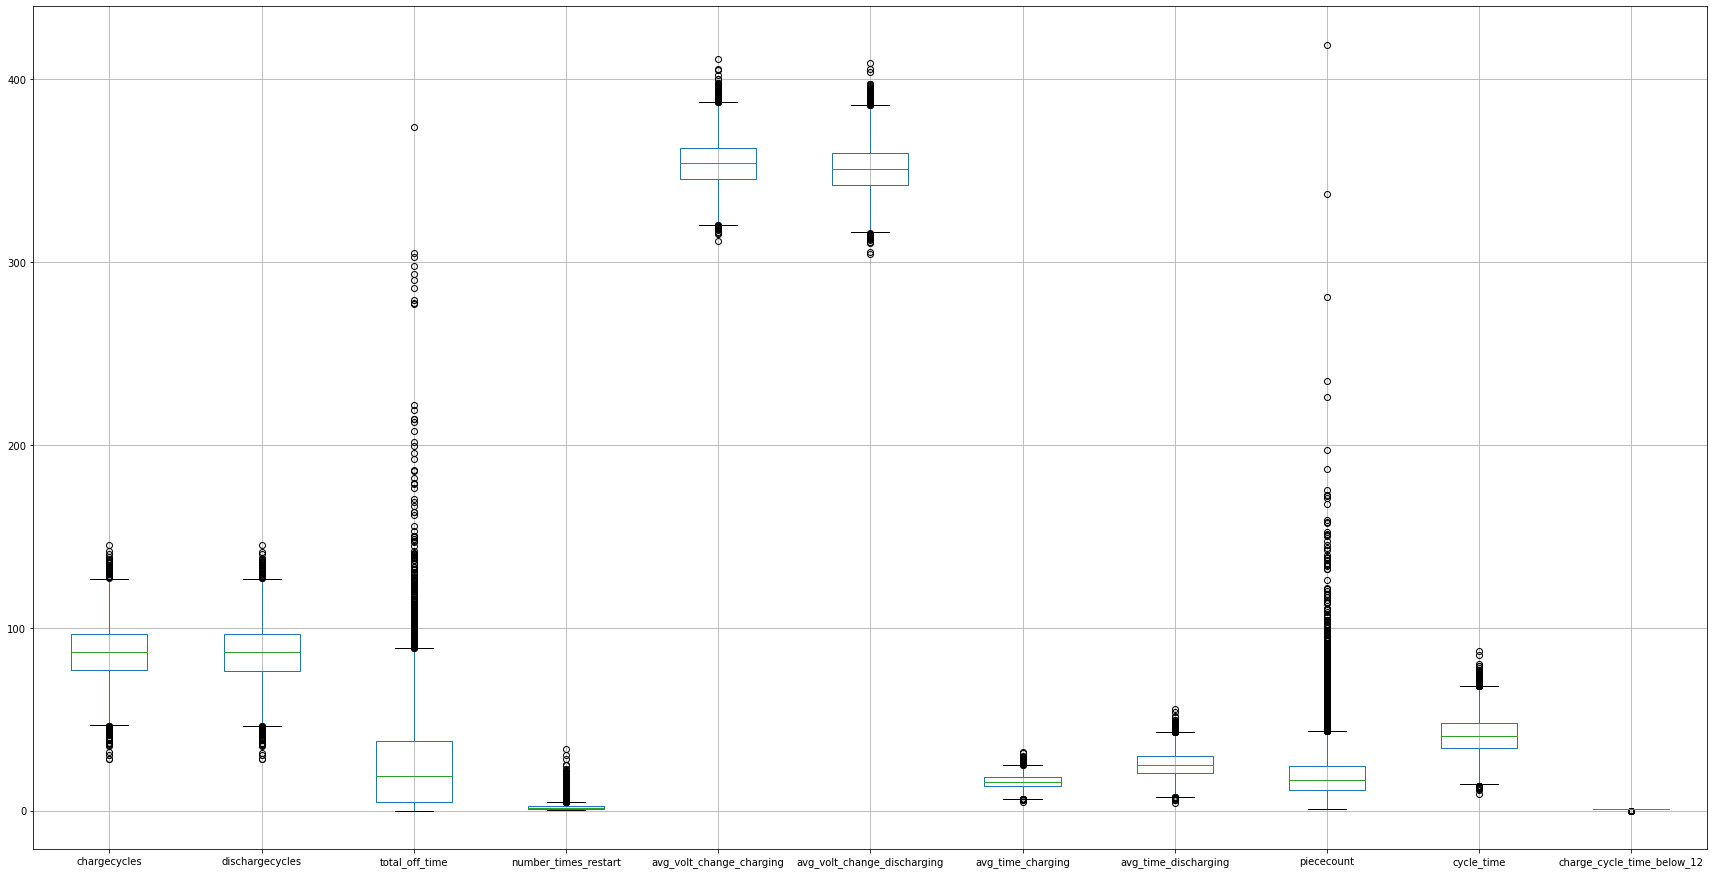

In [14]:
fail.drop(columns=["fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

#### Analysis of (only) boolean predictor 'charge_cycle_time_below_12':
##### normal charge cycles is 12, bool variable is flag set for when that doesnt happen 

In [15]:
fail['charge_cycle_time_below_12'].value_counts(normalize=True)

#6993/failed.shape[0] = 85% of devices that failed had charge cycle time below 12 

True     0.849378
False    0.150622
Name: charge_cycle_time_below_12, dtype: float64

In [16]:
nofail['charge_cycle_time_below_12'].value_counts(normalize=True)

True     0.512364
False    0.487636
Name: charge_cycle_time_below_12, dtype: float64

In [17]:
#bool col CCTB12 True is when total charges cyles time less than 12 units (which is normal)

norm_charge_false_mask = train['charge_cycle_time_below_12'] == False
norm_charge_true_mask = train['charge_cycle_time_below_12'] == True

In [18]:
train[norm_charge_false_mask].fail_7.value_counts(normalize = True)
#of the devices that have normal charge cycles, 8.5% fail 

0    0.914601
1    0.085399
Name: fail_7, dtype: float64

In [19]:
train[norm_charge_true_mask].fail_7.value_counts(normalize = True)
#of the devices that do not have normal charge cycles, 33% fail 

0    0.666165
1    0.333835
Name: fail_7, dtype: float64

#### Analysis of total off time

In [20]:
tot_0_mask = train['total_off_time'] == 0 
tot_0 = train[tot_0_mask]
tot_0.fail_7.value_counts(normalize=True)

#When total off time is 0, 13% of devices fail

0    0.861761
1    0.138239
Name: fail_7, dtype: float64

In [21]:
train2.total_off_time.describe()

count    40500.000000
mean        25.258990
std         37.037053
min          0.000000
25%          3.565217
50%         17.097619
75%         37.000000
max       2013.000000
Name: total_off_time, dtype: float64

In [22]:
tot_max_fail_mask = train['total_off_time'] > 374
tot_max_fail = train[tot_max_fail_mask]
tot_max_fail.fail_7.value_counts()

#when total off time is greater than 374, no devices fail 

0    35
Name: fail_7, dtype: int64

Devices that fail


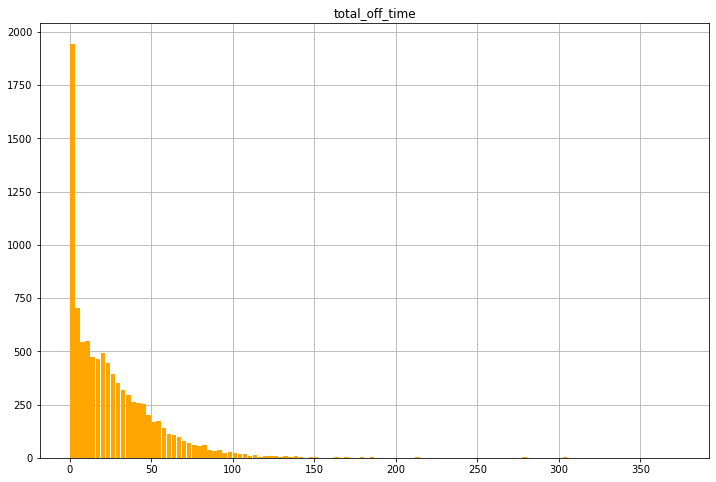

In [23]:
print('Devices that fail')
display(ax = fail.hist(column='total_off_time', bins=120, figsize=(12,8), color='orange', zorder=2, rwidth=0.9))


Devices that do not fail


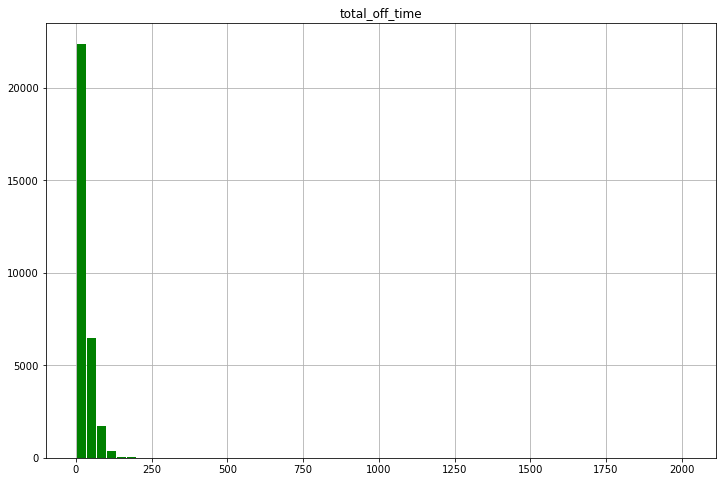

In [24]:
print('Devices that do not fail')
ax = nofail.hist(column='total_off_time', bins=60, figsize=(12,8), color='green', zorder=2, rwidth=0.9)

## Adding new columns

In [25]:
ser_charging_rate = train[['charging_rate_lag3', 'charging_rate_lag4', 'charging_rate_lag5',
       'charging_rate_lag6', 'charging_rate_lag7']].mean(axis=1)
ser_discharging_rate = train[['discharging_rate_lag3',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag7',
       'discharging_rate_lag8']].mean(axis=1)

train2['AVG_charging_rate'] = ser_charging_rate
train2['AVG_discharging_rate'] = ser_discharging_rate

In [26]:
train2['Date Deployed'] = pd.to_datetime(train2['Date Deployed']).dt.strftime('%Y-%m-%d')
years=[]
months=[]

for dates in train2['Date Deployed']:
    dates[1].lstrip('0')
    dates = dates.split("-")
    year = int(dates[0])
    month = int(dates[1])
    years.append(year)
    months.append(month)

train2['Year Deployed'] = years
train2['Month Deployed'] = months
train2['age_of_battery'] = (12*(2021 - train2['Year Deployed']) + 4) - train2['Month Deployed']
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40500 entries, 28647 to 20795
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargecycles                 40500 non-null  float64
 1   dischargecycles              40500 non-null  float64
 2   total_off_time               40500 non-null  float64
 3   number_times_restart         40500 non-null  float64
 4   avg_volt_change_charging     40500 non-null  float64
 5   avg_volt_change_discharging  40500 non-null  float64
 6   avg_time_charging            40500 non-null  float64
 7   avg_time_discharging         40500 non-null  float64
 8   max_voltage_day              40500 non-null  float64
 9   piececount                   40500 non-null  float64
 10  cycle_time                   40500 non-null  float64
 11  Date Deployed                40500 non-null  object 
 12  charge_cycle_time_below_12   40500 non-null  bool   
 13  fail_7      

In [27]:
# add lag 4,3,2,1 columns back
trainlag3 = train[['deviceid','avg_time_charging_lag1', 'avg_time_charging_lag2','avg_time_charging_lag3', 'avg_time_charging_lag4',
        'avg_time_discharging_lag1', 'avg_time_discharging_lag2', 'avg_time_discharging_lag3', 'avg_time_discharging_lag4',
        'charging_rate_lag3', 'discharging_rate_lag3', 'charging_rate_lag4', 'discharging_rate_lag4']].copy()
trainlag3 = trainlag3.set_index('deviceid')

train2 = pd.concat([train2, trainlag3], axis = 1)

In [28]:
# fill null values of AVG_charging_rate & AVG_discharging_rate
mean_charge = train2['AVG_charging_rate'].mean()
mean_discharge = train2['AVG_discharging_rate'].mean()
train2['AVG_charging_rate'].fillna(value=mean_charge, inplace=True)    
train2['AVG_discharging_rate'].fillna(value=mean_charge, inplace=True)

In [29]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40500 entries, 28647 to 20795
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargecycles                 40500 non-null  float64
 1   dischargecycles              40500 non-null  float64
 2   total_off_time               40500 non-null  float64
 3   number_times_restart         40500 non-null  float64
 4   avg_volt_change_charging     40500 non-null  float64
 5   avg_volt_change_discharging  40500 non-null  float64
 6   avg_time_charging            40500 non-null  float64
 7   avg_time_discharging         40500 non-null  float64
 8   max_voltage_day              40500 non-null  float64
 9   piececount                   40500 non-null  float64
 10  cycle_time                   40500 non-null  float64
 11  Date Deployed                40500 non-null  object 
 12  charge_cycle_time_below_12   40500 non-null  bool   
 13  fail_7      

## More visualizations, looking for patterns in lag 3 charging rate, discharging rate 

In [30]:
age_categories = train2['age_of_battery'].unique()
age_categories

array([18, 19, 17, 20, 16, 15, 14], dtype=int64)

<AxesSubplot:xlabel='age_of_battery', ylabel='count'>

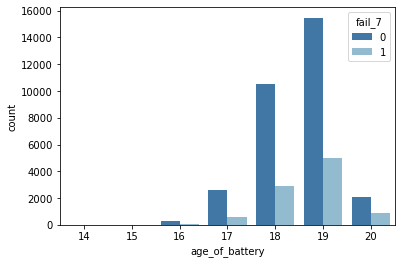

In [31]:
sns.set_palette('RdBu_r')
sns.countplot(data=train2, x='age_of_battery', hue='fail_7')

In [32]:
train3  = train2   #train3 is a copy of train2

train3['charging_rate_lag4'] = train3['charging_rate_lag4'].abs()
train3['discharging_rate_lag4'] = train3['discharging_rate_lag4'].abs()
train3['discharging_rate_lag3'] = train3['discharging_rate_lag3'].abs()
train3['charging_rate_lag3'] = train3['charging_rate_lag3'].abs()

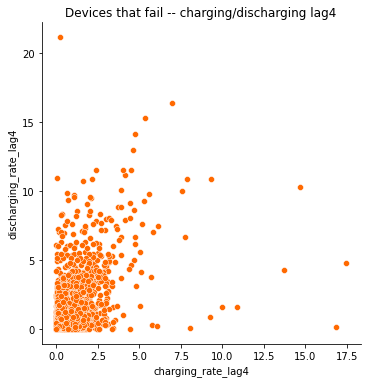

In [33]:
custom_palette1 = ['#FF6900','#00D084']
custom_palette2 = ['#008000','#228B22']

sns.set_palette(custom_palette1)
sns.relplot(data=train3[train3["fail_7"]==1], x='charging_rate_lag4',
            y='discharging_rate_lag4', kind='scatter').set(title='Devices that fail -- charging/discharging lag4')
plt.show()

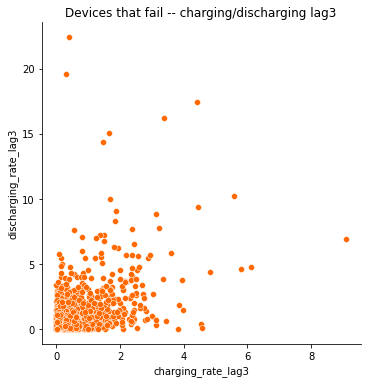

In [34]:
sns.relplot(data=train3[train3["fail_7"]==1], x='charging_rate_lag3', 
            y='discharging_rate_lag3', kind='scatter').set(title='Devices that fail -- charging/discharging lag3')
plt.show()

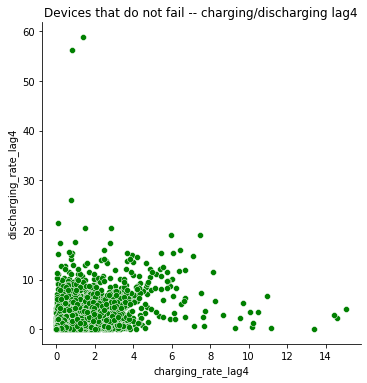

In [35]:
sns.set_palette(custom_palette2)
sns.relplot(data=train3[train3["fail_7"]==0], x='charging_rate_lag4', 
            y='discharging_rate_lag4', kind='scatter').set(title='Devices that do not fail -- charging/discharging lag4')
plt.show()

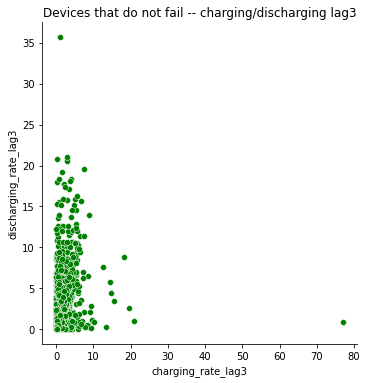

In [36]:
sns.relplot(data=train3[train3["fail_7"]==0], x='charging_rate_lag3', 
            y='discharging_rate_lag3', kind='scatter').set(title='Devices that do not fail -- charging/discharging lag3')
plt.show()

### Making predictions. We will be using train2 to make predictions: 

In [37]:
train2 = train2.drop(columns=['Date Deployed'])

In [38]:
train2.shape

(40500, 30)

In [39]:
'''
First Model- Logistic Regression, train2

'''
X_train, X_test, y_train, y_test = train_test_split(train2.drop('fail_7', axis = 1), train2['fail_7'])
logreg = linear_model.LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[7733,   84],
       [2232,   76]], dtype=int64)

In [40]:
cmn

array([[0.98925419, 0.01074581],
       [0.96707106, 0.03292894]])

In [41]:
'''
Second Logistic Regression Model - train2, scaled with MinMax

'''
#scale on all columns except for dates and response
scale_on = train2[train2.drop(columns = ['Year Deployed', 'Month Deployed', 'age_of_battery', 'fail_7']).columns]
date_cols = train2[['Year Deployed', 'Month Deployed', 'age_of_battery', 'fail_7']]
cols = scale_on.columns
ms = MinMaxScaler()

trainscale = ms.fit_transform(scale_on)
trainscale = pd.DataFrame(trainscale, columns = cols, index=train2.index)
trainscale = pd.concat([trainscale, date_cols], axis = 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(trainscale.drop('fail_7', axis = 1), trainscale['fail_7'])
logreg = linear_model.LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[7623,   45],
       [2406,   51]], dtype=int64)

In [44]:
cmn

array([[0.99413146, 0.00586854],
       [0.97924298, 0.02075702]])

In [45]:
'''
Third Logistic Regression Model - train2, standardized

'''
scale_std = train2[train2.drop(columns = ['Year Deployed', 'Month Deployed', 'age_of_battery', 'fail_7']).columns]
date_cols = train2[['Year Deployed', 'Month Deployed', 'age_of_battery', 'fail_7']]
cols = scale_on.columns
scaler = StandardScaler()

trainstd = scaler.fit_transform(scale_std)
trainstd = pd.DataFrame(trainstd, columns = cols, index=train2.index)
trainstd = pd.concat([trainstd, date_cols], axis = 1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(trainstd.drop('fail_7', axis = 1), trainstd['fail_7'])
logreg = linear_model.LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[7722,   62],
       [2259,   82]], dtype=int64)

In [48]:
cmn

array([[0.99203494, 0.00796506],
       [0.96497223, 0.03502777]])

In [49]:
'''
Logistic regression is not a good model 
'''

'\nLogistic regression is not a good model \n'

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

In [51]:
'''
Decision Tree on train2 
'''
y = train2["fail_7"]  # Specify one column as the target variable
X = train2.drop('fail_7', axis = 1)  # Specify at least two columns as features


# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28350, 29), (12150, 29), (28350,), (12150,))

In [52]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list((range(4, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a decision tree classifer object
clf = DecisionTreeClassifier(random_state=123)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=20,  # Number of parameter candidate settings to sample
    verbose=3,  # The higher this is, the more messages are outputed
    random_state=123,
)

# Train the model on the training set
clf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", clf_rs.best_params_)
print("Best accuracy found: ", clf_rs.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV 2/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV 3/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV 1/3] END ccp_alpha=0, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV 2/3] END ccp_alpha=0, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2; total time=   0.2

In [53]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "entropy",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 3,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.001,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

In [54]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8167901234567901


In [55]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[8881,  486],
       [1740, 1043]], dtype=int64)

In [56]:
cmn

array([[0.94811573, 0.05188427],
       [0.62522458, 0.37477542]])

[Text(913.0909090909091, 1195.92, 'charge_cycle_time_below_12 <= 0.5\nentropy = 0.784\nsamples = 28350\nvalue = [21732, 6618]'),
 Text(243.4909090909091, 978.48, 'number_times_restart <= 1.26\nentropy = 0.428\nsamples = 11593\nvalue = [10578, 1015]'),
 Text(121.74545454545455, 761.0400000000001, 'entropy = 0.345\nsamples = 4536\nvalue = [4243, 293]'),
 Text(365.23636363636365, 761.0400000000001, 'charging_rate_lag3 <= 0.085\nentropy = 0.476\nsamples = 7057\nvalue = [6335, 722]'),
 Text(243.4909090909091, 543.6, 'entropy = 0.633\nsamples = 1161\nvalue = [976, 185]'),
 Text(486.9818181818182, 543.6, 'entropy = 0.44\nsamples = 5896\nvalue = [5359, 537]'),
 Text(1582.6909090909091, 978.48, 'discharging_rate_lag3 <= 0.122\nentropy = 0.919\nsamples = 16757\nvalue = [11154, 5603]'),
 Text(973.9636363636364, 761.0400000000001, 'avg_volt_change_discharging <= 347.736\nentropy = 0.793\nsamples = 11783\nvalue = [8970, 2813]'),
 Text(730.4727272727273, 543.6, 'charging_rate_lag3 <= 0.025\nentropy 

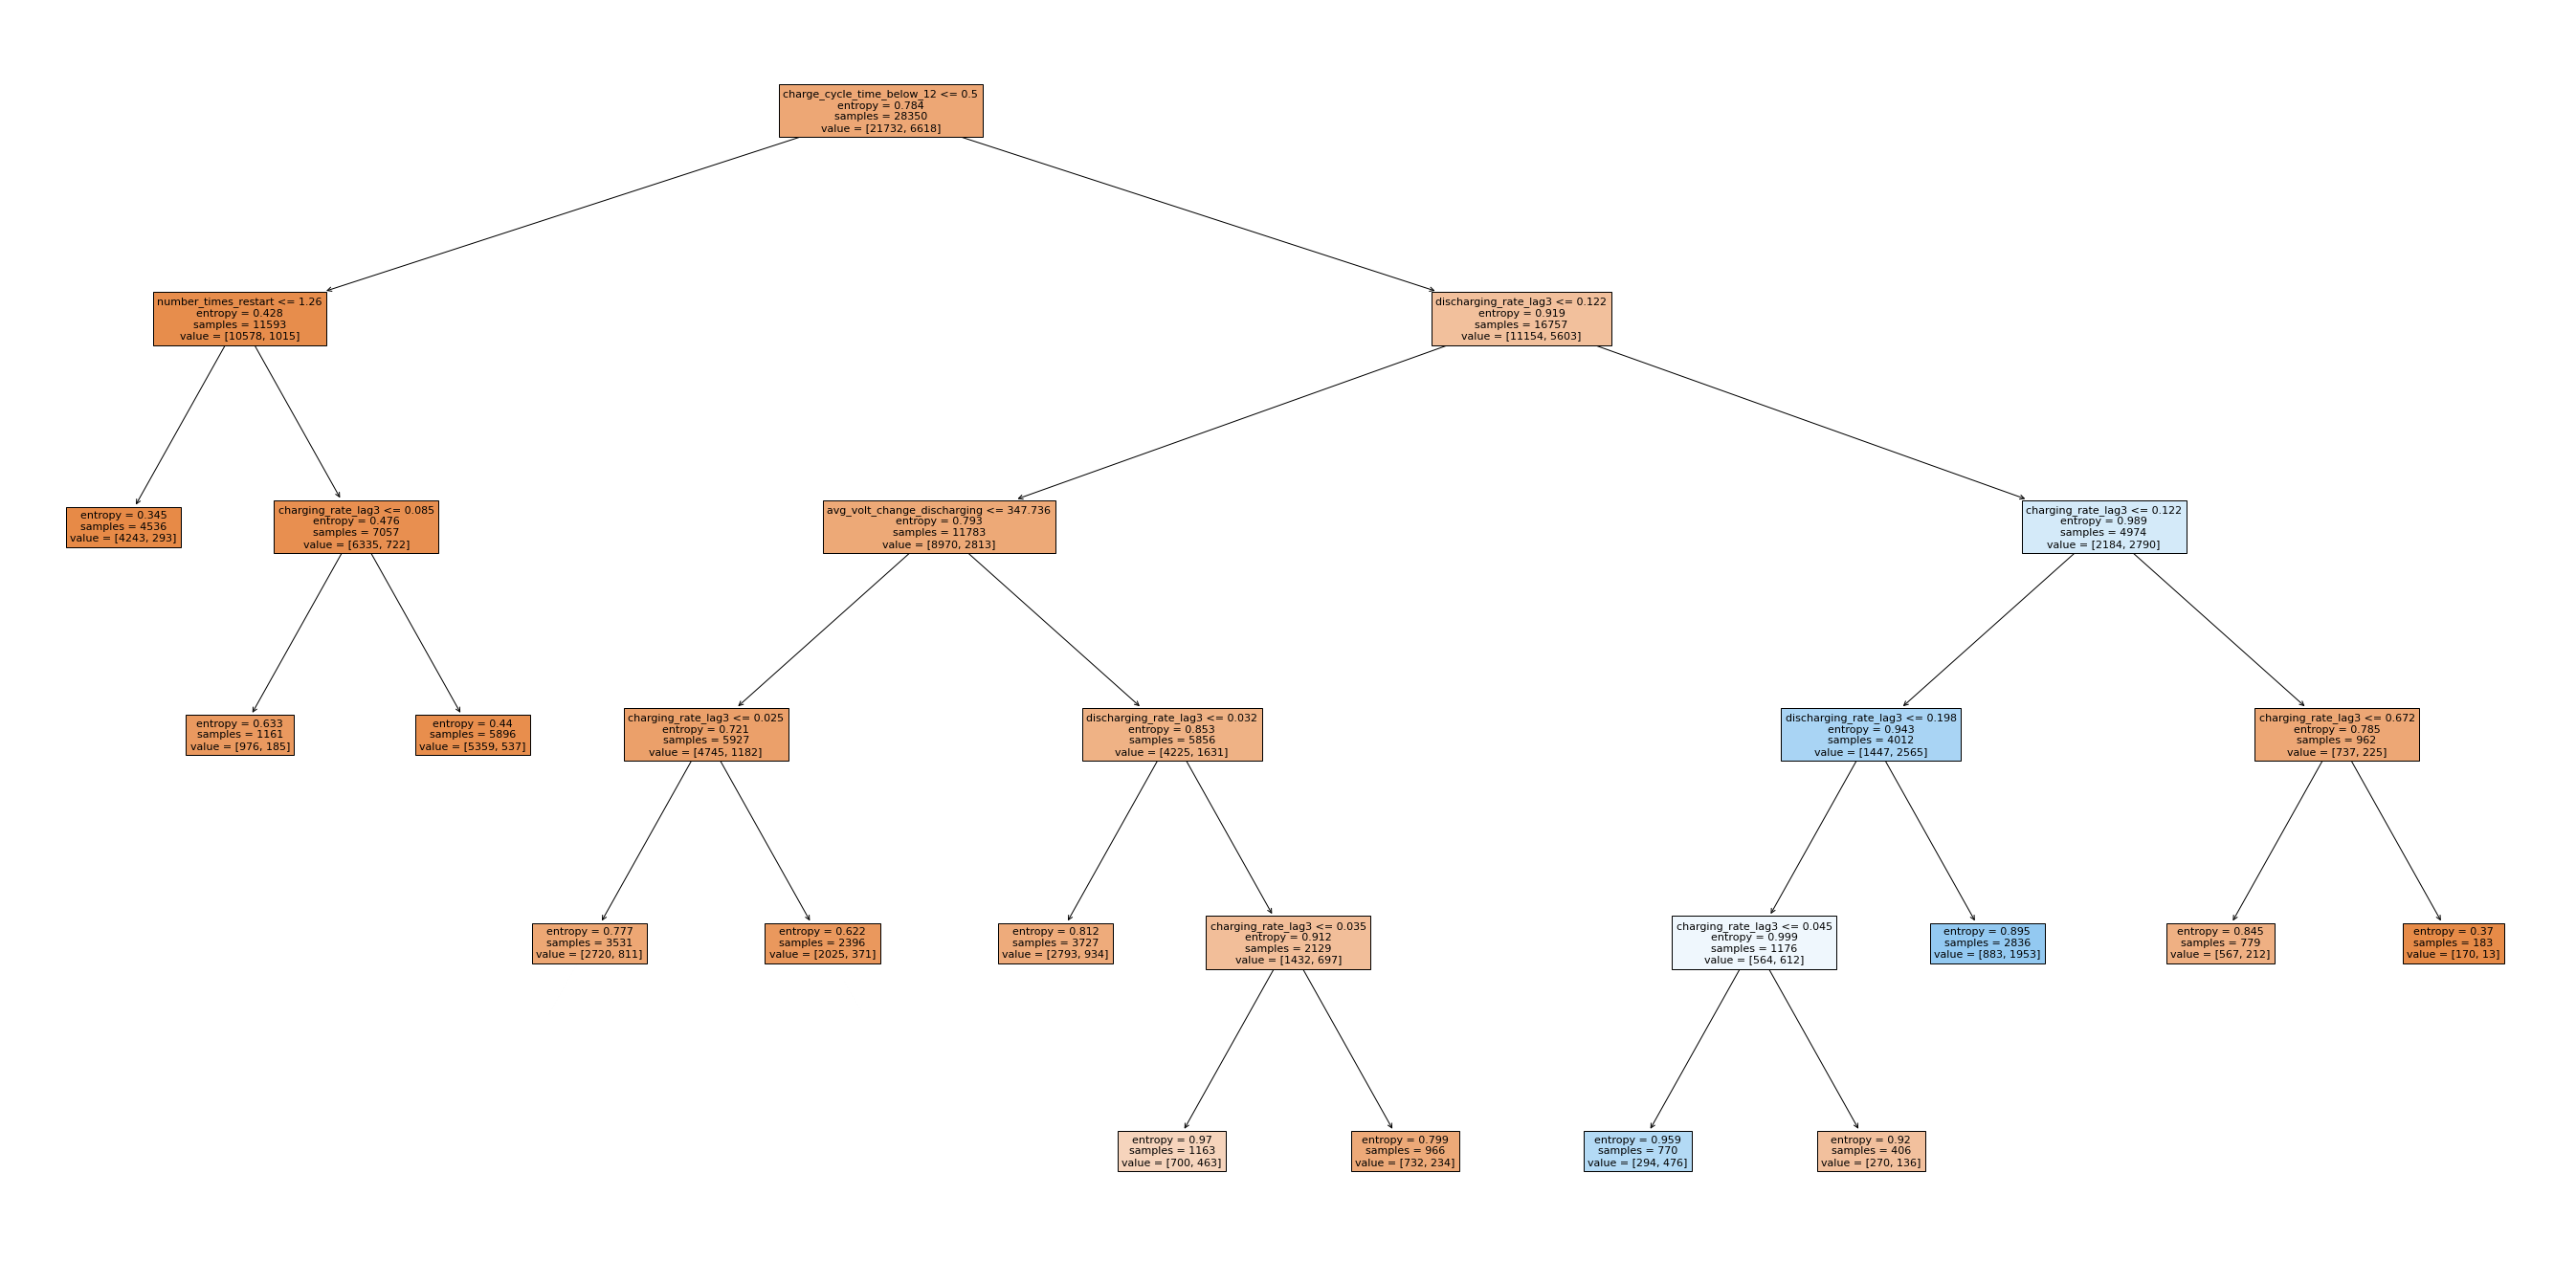

In [57]:
plt.figure(figsize=(48, 24))
tree.plot_tree(clf, feature_names=X.columns, filled = True)



In [58]:
'''
Decision Tree on standardized train2 
'''
y = trainstd["fail_7"]  # Specify one column as the target variable
X = trainstd.drop('fail_7', axis = 1)  # Specify at least two columns as features


# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=125
)

clf = DecisionTreeClassifier(random_state=125)
clf_rs.fit(X_train, y_train)
print("Best parameters found: ", clf_rs.best_params_)
print("Best accuracy found: ", clf_rs.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV 2/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV 3/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 1/3] END ccp_alpha=0, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV 2/3] END ccp_alpha=0, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2; total time=   0.1

In [59]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 7,  # Max depth of the tree
    "min_samples_split": 4,  # Min number of samples required to split a node
    "min_samples_leaf": 3,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.001,  # Cost complexity parameter for pruning
    "random_state": 126,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

In [60]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[8836,  525],
       [1746, 1043]], dtype=int64)

In [61]:
cmn

array([[0.94391625, 0.05608375],
       [0.62603084, 0.37396916]])

[Text(1004.4000000000001, 1195.92, 'charge_cycle_time_below_12 <= -0.184\ngini = 0.358\nsamples = 28350\nvalue = [21738, 6612]'),
 Text(669.6, 978.48, 'gini = 0.157\nsamples = 11602\nvalue = [10604, 998]'),
 Text(1339.2, 978.48, 'discharging_rate_lag3 <= -0.367\ngini = 0.446\nsamples = 16748\nvalue = [11134, 5614]'),
 Text(669.6, 761.0400000000001, 'avg_volt_change_charging <= 0.181\ngini = 0.36\nsamples = 11787\nvalue = [9007, 2780]'),
 Text(334.8, 543.6, 'gini = 0.318\nsamples = 7061\nvalue = [5660, 1401]'),
 Text(1004.4000000000001, 543.6, 'gini = 0.413\nsamples = 4726\nvalue = [3347, 1379]'),
 Text(2008.8000000000002, 761.0400000000001, 'charging_rate_lag3 <= -0.238\ngini = 0.49\nsamples = 4961\nvalue = [2127, 2834]'),
 Text(1674.0, 543.6, 'discharging_rate_lag3 <= -0.301\ngini = 0.458\nsamples = 4012\nvalue = [1426, 2586]'),
 Text(1339.2, 326.15999999999997, 'charging_rate_lag3 <= -0.33\ngini = 0.499\nsamples = 1161\nvalue = [556, 605]'),
 Text(1004.4000000000001, 108.720000000000

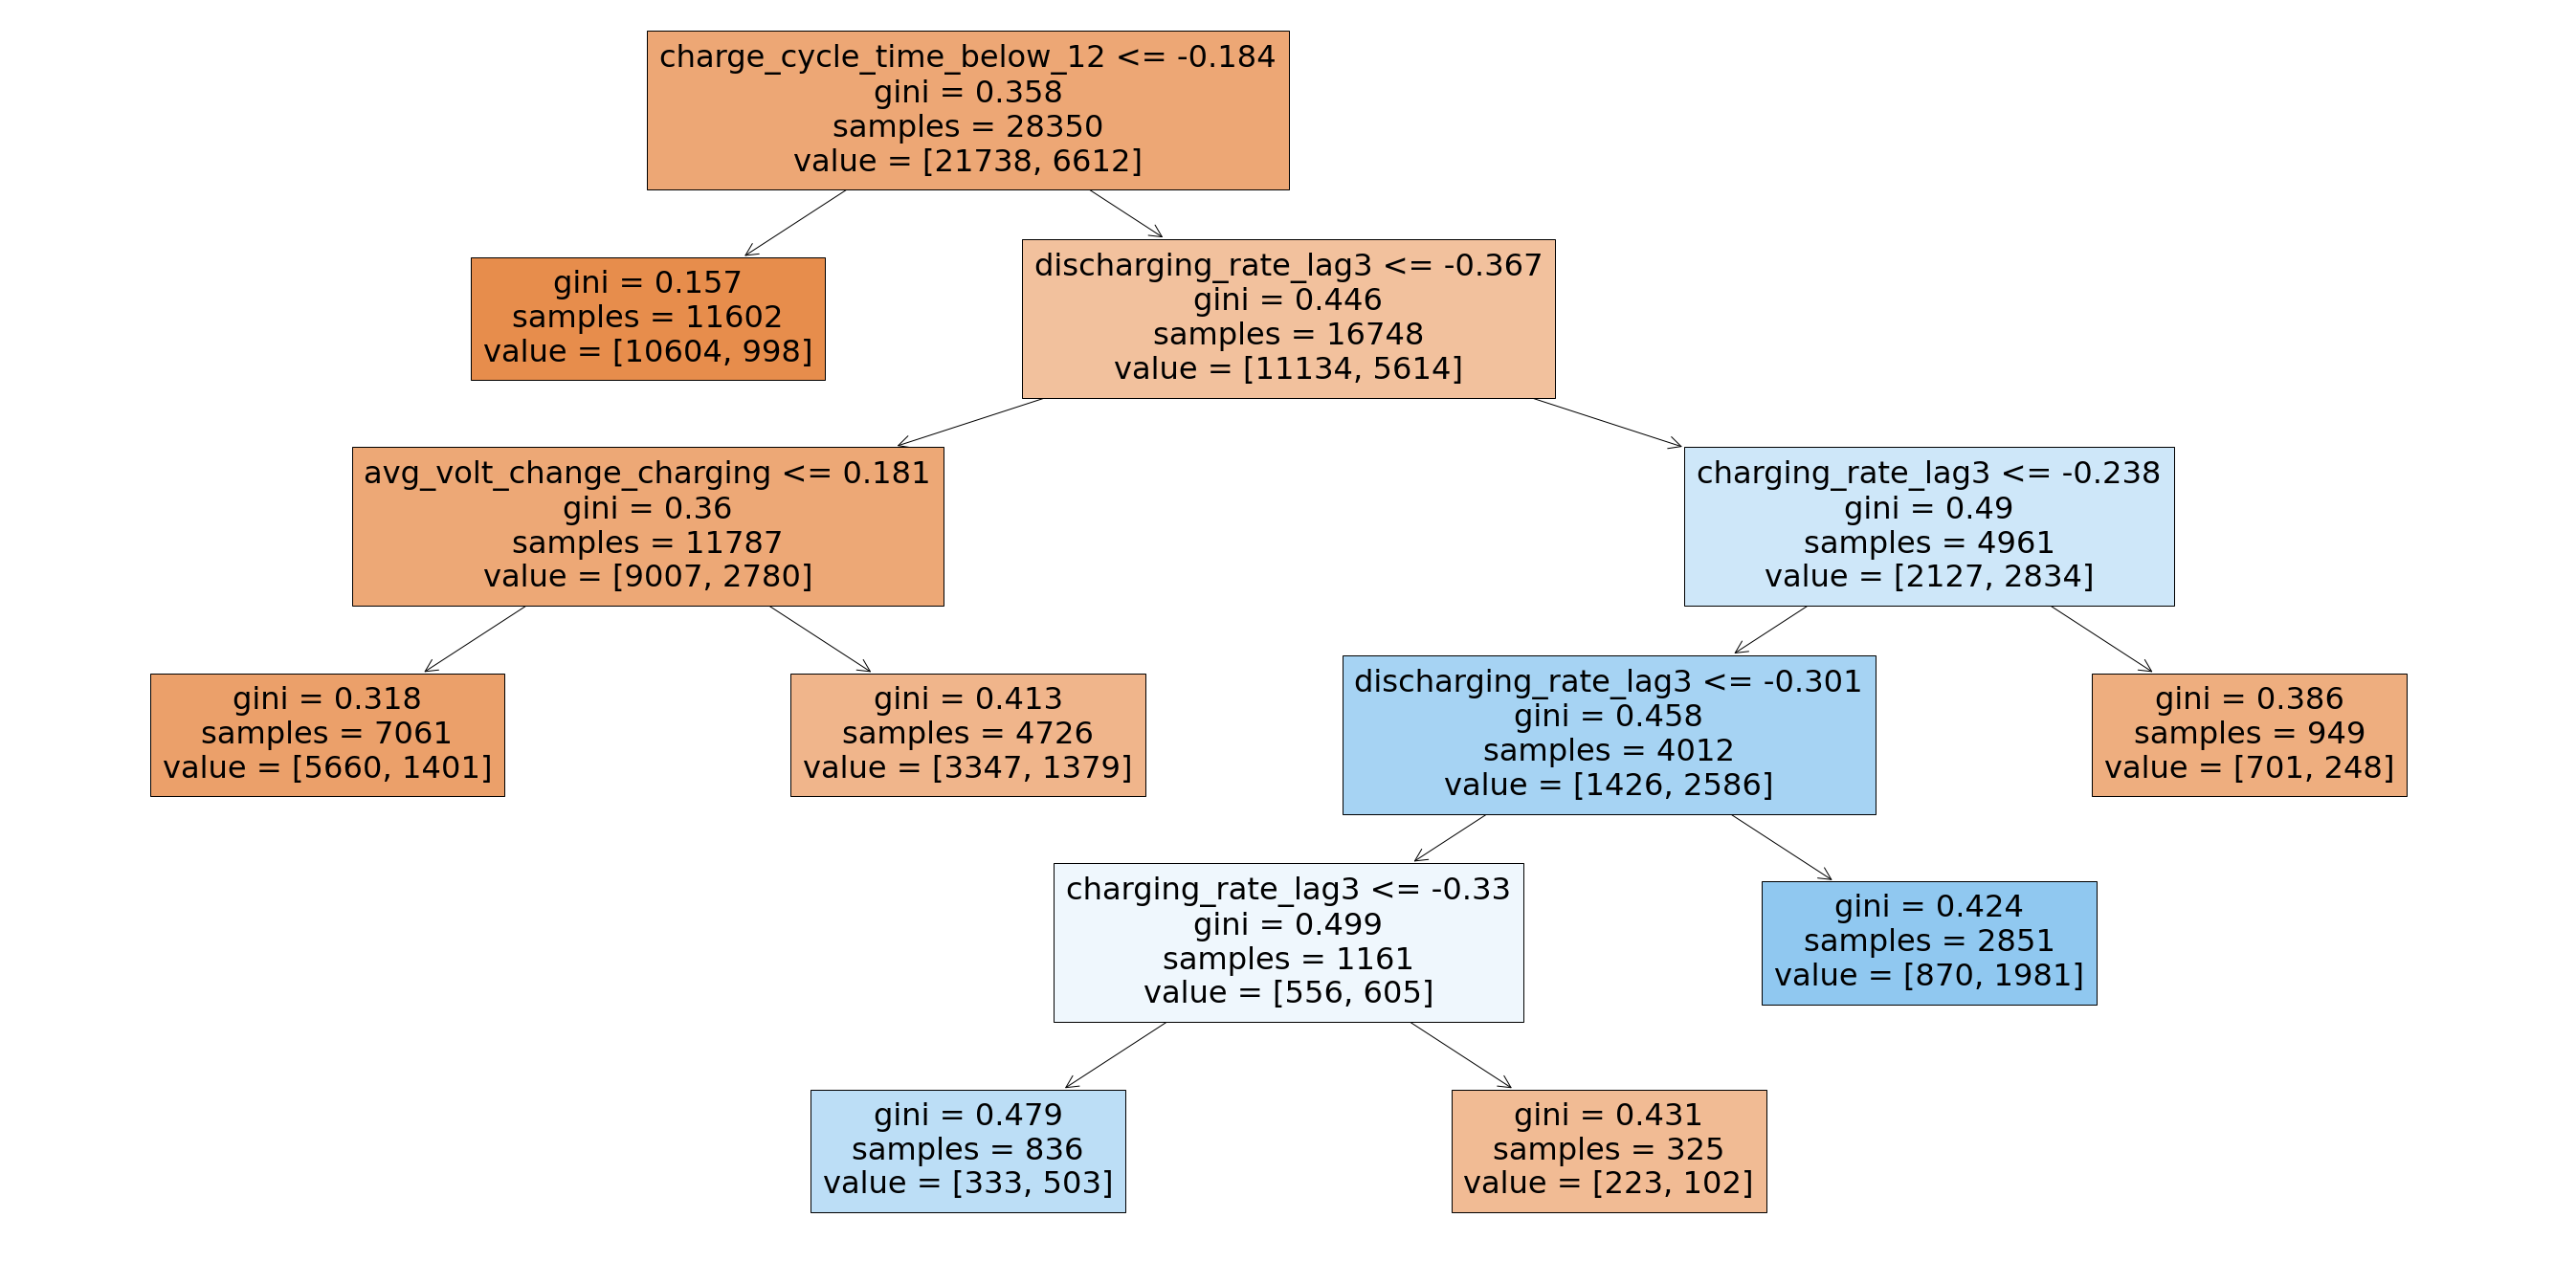

In [62]:
plt.figure(figsize=(48, 24))
tree.plot_tree(clf, feature_names=X.columns, filled = True)

#### XGBoost

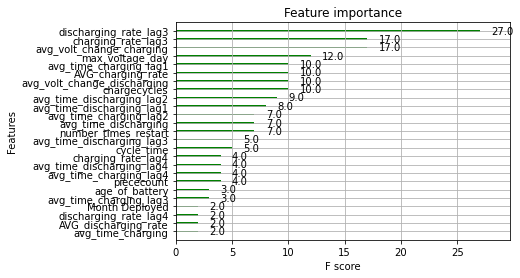

In [63]:
data_dmatrix = xgb.DMatrix(data = X, label = y)
params = {"objective": 'binary:logistic', 
          "colsample_bytree" : 0.3,
          "learning_rate" : 0.1,
            "max_depth" : 5, 
          "alpha" : 10
}

cv_results = xgb.cv(dtrain = data_dmatrix, params = params, nfold = 3,
                   num_boost_round = 50, early_stopping_rounds = 10, 
                    metrics = "rmse", seed = 123)

xg_reg = xgb.train(params = params, dtrain = data_dmatrix, num_boost_round =10 )
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20,20]
plt.show()


In [64]:
'''
XGBoost on train2
'''

y = train2['fail_7']
X = train2.drop('fail_7', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 106)

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1,
                      max_depth = 6, alpha = 3, n_estimators= 70)
xg_reg.fit(X_train, y_train)
pred = xg_reg.predict(X_test)
cm = confusion_matrix(y_test, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmn

array([[0.95001295, 0.04998705],
       [0.64128173, 0.35871827]])

In [65]:
cmn

array([[0.95001295, 0.04998705],
       [0.64128173, 0.35871827]])

#### Trying unsupervised learning method: K Means 

In [66]:
'''
K Means on train2 
'''
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans = kmeans.fit(train2)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 16744 out of 40500 samples were correctly labeled.
Accuracy score: 0.41


In [67]:
'''
K Means on train2 min/max scaled
'''
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans = kmeans.fit(trainscale)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 19386 out of 40500 samples were correctly labeled.
Accuracy score: 0.48


In [68]:
'''
K Means on train2 standardized
'''
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans = kmeans.fit(trainstd)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 20958 out of 40500 samples were correctly labeled.
Accuracy score: 0.52
